In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline  #pipeline class from sklearn allows us to sequentially apply a series of transformations
from sklearn.preprocessing import StandardScaler #helps us to normalize features that have different scales by removing the mean and scaling to unit variance.
from sklearn.compose import ColumnTransformer #used when we have a mixture of numerical and categorical data, and to apply different transformation to different columns



In [2]:
df=pd.read_csv("C:/Users/kavir/OneDrive/Documents/GitHub/Data-Mining-CSCI-5502-872-Course-Project/datasets/training_df_raw.csv")


In [3]:
df.fillna(0,inplace=True)
df.drop(['date','time'],axis=1,inplace=True)

In [4]:
df.head()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,fire
0,10.4600,95.42882,9.7600,9.326071,0.0,0.0,0.0,0.0,0.0,1012.4,...,11.879999,10.7600,13.110001,14.0100,21.910000,0.275,0.318,0.195,0.026,1
1,10.4535,95.42859,9.7535,9.317741,0.0,0.0,0.0,0.0,0.0,1012.4,...,11.879999,10.7535,13.103500,14.0035,21.903500,0.275,0.318,0.195,0.026,1
2,10.4145,95.42721,9.7145,9.267784,0.0,0.0,0.0,0.0,0.0,1012.4,...,11.879999,10.7145,13.064501,13.9645,21.864500,0.275,0.318,0.195,0.026,1
3,9.2235,99.66392,9.1735,8.143780,0.0,0.0,0.0,0.0,0.0,1012.5,...,13.320000,10.4235,12.823500,13.7235,21.923500,0.273,0.324,0.201,0.020,1
4,9.2430,99.66399,9.1930,8.168585,0.0,0.0,0.0,0.0,0.0,1012.5,...,13.320000,10.4430,12.842999,13.7430,21.942999,0.273,0.324,0.201,0.020,1


In [5]:
df.shape

(113896, 31)

In [6]:
X=df.drop('fire',axis=1)
y=df['fire']

In [7]:
#feature scaling
def feature_transformation(encode_df):
    num_attributes = encode_df.columns.to_list()
    numeric_pipeline = Pipeline([('std_scaler', StandardScaler())])
    encoder_pipeline = ColumnTransformer([("numeric_var", numeric_pipeline, num_attributes)])
    df_encoded = encoder_pipeline.fit_transform(encode_df)
    return df_encoded, encoder_pipeline

X_transformed, encoder_pipeline = feature_transformation(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# Initialize KNN with default parameters
knn = KNeighborsClassifier(n_jobs=-1)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')

print(f"KNN: Mean Accuracy = {np.mean(knn_scores):.4f}, Std Dev = {np.std(knn_scores):.4f}")


KNN: Mean Accuracy = 0.7282, Std Dev = 0.0041


In [10]:
#NB

from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
nb = GaussianNB()

# K-Fold Cross Validation
nb_scores = cross_val_score(nb, X_train, y_train, cv=kf, scoring='accuracy')

print(f"Naive Bayes: Mean Accuracy = {np.mean(nb_scores):.4f}, Std Dev = {np.std(nb_scores):.4f}")


Naive Bayes: Mean Accuracy = 0.5432, Std Dev = 0.0163


In [11]:
#Extended Bayesian Optimization KNN

from skopt import BayesSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Extended search space for KNN
param_space_knn = {
    'n_neighbors': (1, 20),                          # Wider range for n_neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Bayesian Optimization with KNN
bayes_search_knn = BayesSearchCV(
    estimator=KNeighborsClassifier(n_jobs=-1),
    search_spaces=param_space_knn,
    n_iter=50,                               # Increased iterations for better tuning
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the model
bayes_search_knn.fit(X_train, y_train)

# Best parameters and score for KNN
print("Best parameters for KNN (Bayesian Optimization):", bayes_search_knn.best_params_)
print("Best KNN score (Bayesian Optimization):", bayes_search_knn.best_score_)


c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('euclidean'), np.int64(5), np.str_('distance')] before, using random point ['euclidean', np.int64(9), 'uniform']
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('manhattan'), np.int64(1), np.str_('uniform')] before, using random point ['minkowski', np.int64(3), 'distance']
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt

Best parameters for KNN (Bayesian Optimization): OrderedDict({'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'})
Best KNN score (Bayesian Optimization): 0.7736511398368384


In [12]:
#Extended Bayesian Optimization NB

from skopt import BayesSearchCV
from sklearn.naive_bayes import GaussianNB

# Extended search space for Naive Bayes
param_space_nb = {
    'var_smoothing': (1e-10, 1e-2, 'log-uniform')  # Wider range for var_smoothing
}

# Bayesian Optimization with Naive Bayes
bayes_search_nb = BayesSearchCV(
    estimator=GaussianNB(),
    search_spaces=param_space_nb,
    n_iter=50,                                # Increased iterations
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the model
bayes_search_nb.fit(X_train, y_train)

# Best parameters and score for Naive Bayes
print("Best parameters for Naive Bayes (Bayesian Optimization):", bayes_search_nb.best_params_)
print("Best Naive Bayes score (Bayesian Optimization):", bayes_search_nb.best_score_)


Best parameters for Naive Bayes (Bayesian Optimization): OrderedDict({'var_smoothing': 1.5462737355054794e-07})
Best Naive Bayes score (Bayesian Optimization): 0.5660695551025565


In [13]:
#Ensemble Model for Improved Accuracy

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# Initialize the best KNN and Naive Bayes models
best_knn = bayes_search_knn.best_estimator_
best_nb = bayes_search_nb.best_estimator_

# Ensemble model - Hard voting
ensemble_model = VotingClassifier(
    estimators=[('knn', best_knn), ('nb', best_nb)],
    voting='hard'
)

# Train and evaluate the ensemble model
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Classification report for ensemble model
print("Ensemble Model Classification Report:")
print(classification_report(y_test, y_pred_ensemble))


Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.81      0.73     11258
           1       0.77      0.61      0.68     11522

    accuracy                           0.71     22780
   macro avg       0.72      0.71      0.71     22780
weighted avg       0.72      0.71      0.71     22780



KNN Classification Report (Bayesian Optimized):
              precision    recall  f1-score   support

           0       0.83      0.72      0.77     11258
           1       0.76      0.86      0.81     11522

    accuracy                           0.79     22780
   macro avg       0.80      0.79      0.79     22780
weighted avg       0.79      0.79      0.79     22780



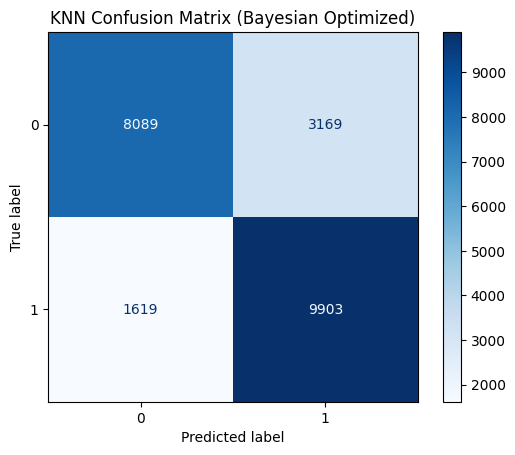

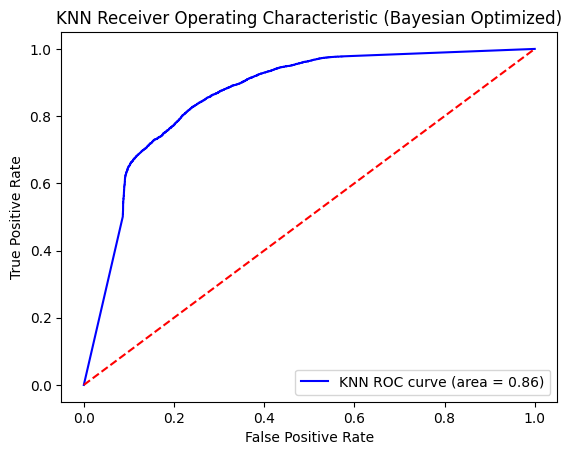

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Use the best KNN model from Bayesian Optimization
best_knn = bayes_search_knn.best_estimator_

# Predictions and probability scores for ROC
y_pred_knn = best_knn.predict(X_test)
y_scores_knn = best_knn.predict_proba(X_test)[:, 1]

# Classification Report
print("KNN Classification Report (Bayesian Optimized):")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=[0, 1]).plot(cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix (Bayesian Optimized)')
plt.show()

# ROC Curve and AUC
auc_score_knn = roc_auc_score(y_test, y_scores_knn)
fpr, tpr, _ = roc_curve(y_test, y_scores_knn)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'KNN ROC curve (area = {auc_score_knn:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Receiver Operating Characteristic (Bayesian Optimized)')
plt.legend(loc='lower right')
plt.show()


Naive Bayes Classification Report (Bayesian Optimized):
              precision    recall  f1-score   support

           0       0.58      0.43      0.50     11258
           1       0.56      0.70      0.62     11522

    accuracy                           0.57     22780
   macro avg       0.57      0.57      0.56     22780
weighted avg       0.57      0.57      0.56     22780



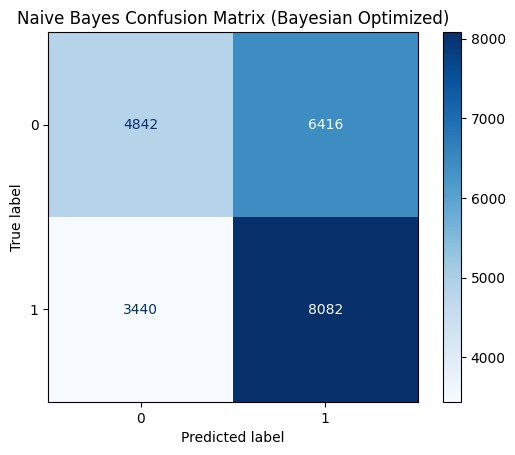

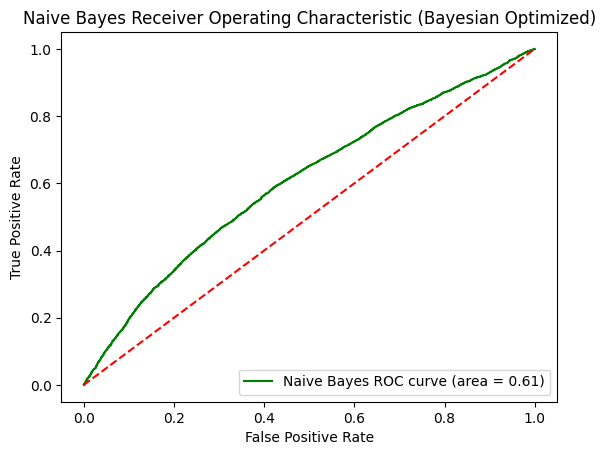

In [15]:
# Use the best Naive Bayes model from Bayesian Optimization
best_nb = bayes_search_nb.best_estimator_

# Predictions and probability scores for ROC
y_pred_nb = best_nb.predict(X_test)
y_scores_nb = best_nb.predict_proba(X_test)[:, 1]

# Classification Report
print("Naive Bayes Classification Report (Bayesian Optimized):")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=[0, 1]).plot(cmap=plt.cm.Blues)
plt.title('Naive Bayes Confusion Matrix (Bayesian Optimized)')
plt.show()

# ROC Curve and AUC
auc_score_nb = roc_auc_score(y_test, y_scores_nb)
fpr, tpr, _ = roc_curve(y_test, y_scores_nb)

plt.figure()
plt.plot(fpr, tpr, color='green', label=f'Naive Bayes ROC curve (area = {auc_score_nb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic (Bayesian Optimized)')
plt.legend(loc='lower right')
plt.show()
